In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import gc
%matplotlib inline



In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Data

In [ ]:
data_transaction =pd.read_csv('/content/drive/My Drive/data_transaction.csv')

In [ ]:
data_identity =pd.read_csv('/content/drive/My Drive/data_identity.csv')

In [ ]:
data_identity.shape

(144233, 41)

In [ ]:
data_transaction.shape

(590540, 394)

In [ ]:
data_identity.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [ ]:
data_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data_identity.isna().sum().sum()

2104107

In [ ]:
data_transaction.isna().sum().sum()

95566686

In [ ]:
data = data_transaction.set_index('TransactionID').join(data_identity.set_index('TransactionID'))
data = data[:70000]  #10% from size of the data to prevent memory crashinng

In [ ]:
data.shape

(70000, 433)

In [ ]:
data.head()

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,
2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


#Data Exploration

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


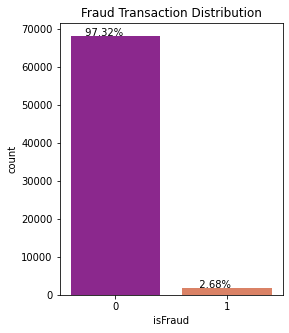

In [ ]:
plt.figure(figsize=(4,5)) 
plt.title("Fraud Transaction Distribution") 
p1 = sns.countplot(data['isFraud'], palette = 'plasma') 
for p in p1.patches: p1.annotate('{:6.2f}%'.format(p.get_height()/len(data)*100), (p.get_x()+0.1, p.get_height()+50)) 
plt.show()

#we have unbalanced data such that only 2.68% are fraudulent

In [ ]:
data.isna().sum().sum()

13396373

In [ ]:
data.describe()

,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,70000.000000,7.000000e+04,70000.000000,70000.000000,69010.000000,69997.000000,69651.000000,65027.000000,65027.000000,22861.000000,...,24594.000000,7614.000000,24589.000000,24584.000000,917.000000,921.000000,853.000000,911.000000,921.000000,18149.000000
mean,0.026843,8.488465e+05,127.389813,9897.769329,368.119417,152.932697,200.537910,291.563028,85.953681,126.256769,...,178.643450,14.030076,362.228517,386.471282,400.061069,15.798046,13.221571,326.881449,151.500543,26.481679
std,0.161625,4.351828e+05,206.876127,4922.373804,159.139430,10.724629,40.540687,104.036450,5.833075,382.031889,...,26.029746,1.499775,146.676148,154.602516,210.904847,6.529901,2.157290,109.003938,31.831114,3.721643
min,0.000000,8.640000e+04,0.292000,1001.000000,100.000000,100.000000,100.000000,100.000000,13.000000,0.000000,...,100.000000,11.000000,100.000000,100.000000,101.000000,14.000000,11.000000,100.000000,100.000000,0.000000
25%,0.000000,4.806908e+05,42.950000,6019.000000,215.000000,150.000000,166.000000,204.000000,87.000000,3.000000,...,166.000000,13.000000,266.000000,222.000000,252.000000,14.000000,11.000000,280.000000,121.000000,24.000000
50%,0.000000,8.575085e+05,70.000000,9709.000000,375.000000,150.000000,226.000000,299.000000,87.000000,9.000000,...,166.000000,15.000000,352.000000,391.000000,252.000000,14.000000,15.000000,321.000000,152.000000,24.000000
75%,0.000000,1.224046e+06,125.000000,14276.000000,514.000000,150.000000,226.000000,330.000000,87.000000,26.000000,...,166.000000,15.000000,492.000000,533.000000,596.000000,14.000000,15.000000,396.000000,182.000000,32.000000
max,1.000000,1.564844e+06,4829.950000,18395.000000,600.000000,229.000000,237.000000,540.000000,102.000000,7068.000000,...,229.000000,29.000000,670.000000,648.000000,853.000000,41.000000,21.000000,545.000000,216.000000,32.000000


In [ ]:
gc.collect()

178

#Selecting the Features with more than 70 percent missing values

In [ ]:
def check_most_missing_cols(df,cols=None,axis=0):
    if cols != None:
        df = df[cols]
    missing_num = df.isnull().sum(axis).to_frame().rename(columns={0:'No of Missing'})
    missing_num['Percent Of missing'] = df.isnull().mean(axis)*100
    df_colmissing= missing_num.sort_values(by='Percent Of missing',ascending = False) 
    most_misssig_cols = [df_colmissing for row in df_colmissing['Percent Of missing'] if row>70]
    print(len(most_misssig_cols))
    return df_colmissing.iloc[:len(most_misssig_cols),:]

In [ ]:
check_most_missing_cols(data,cols=None,axis=0)


30


,No of Missing,Percent Of missing
id_24,69147,98.781429
id_25,69089,98.698571
id_21,69083,98.690000
id_08,69080,98.685714
id_07,69080,98.685714
id_22,69079,98.684286
id_27,69079,98.684286
id_26,69079,98.684286
id_23,69079,98.684286
D7,66250,94.642857


In [ ]:
most_missing_cols=['id_24','id_25','id_21','id_26','id_08','id_07','id_27','id_23','id_22','D7','dist2','D13','D12','D14','id_18','D6','M9','M8','M7','id_04','id_03','id_09','D9','D8','id_10','id_33','V6','V1','V2','D11','V3','V5','V4','V7','V9','V8']

#removing the features with more than 70 percent missing values

In [ ]:
#removing cols with missing values more than 70 percent to ensure we don't loss important data
data=data.drop(most_missing_cols, axis=1)

In [ ]:
data.describe()

,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,...,id_02,id_05,id_06,id_11,id_13,id_14,id_17,id_19,id_20,id_32
count,70000.000000,7.000000e+04,70000.000000,70000.000000,69010.000000,69997.000000,69651.000000,65027.000000,65027.000000,22861.000000,...,24803.000000,24086.000000,24086.000000,24807.000000,19956.000000,18472.000000,24594.000000,24589.000000,24584.000000,18149.000000
mean,0.026843,8.488465e+05,127.389813,9897.769329,368.119417,152.932697,200.537910,291.563028,85.953681,126.256769,...,132593.597589,1.893174,-5.745454,99.684576,47.545901,-345.609030,178.643450,362.228517,386.471282,26.481679
std,0.161625,4.351828e+05,206.876127,4922.373804,159.139430,10.724629,40.540687,104.036450,5.833075,382.031889,...,119860.115655,5.166709,15.763121,1.237012,10.458434,84.785713,26.029746,146.676148,154.602516,3.721643
min,0.000000,8.640000e+04,0.292000,1001.000000,100.000000,100.000000,100.000000,100.000000,13.000000,0.000000,...,1120.000000,-31.000000,-100.000000,90.000000,11.000000,-600.000000,100.000000,100.000000,100.000000,0.000000
25%,0.000000,4.806908e+05,42.950000,6019.000000,215.000000,150.000000,166.000000,204.000000,87.000000,3.000000,...,54731.000000,0.000000,-4.000000,100.000000,49.000000,-360.000000,166.000000,266.000000,222.000000,24.000000
50%,0.000000,8.575085e+05,70.000000,9709.000000,375.000000,150.000000,226.000000,299.000000,87.000000,9.000000,...,99002.000000,0.000000,0.000000,100.000000,52.000000,-300.000000,166.000000,352.000000,391.000000,24.000000
75%,0.000000,1.224046e+06,125.000000,14276.000000,514.000000,150.000000,226.000000,330.000000,87.000000,26.000000,...,169219.500000,1.000000,0.000000,100.000000,52.000000,-300.000000,166.000000,492.000000,533.000000,32.000000
max,1.000000,1.564844e+06,4829.950000,18395.000000,600.000000,229.000000,237.000000,540.000000,102.000000,7068.000000,...,998295.000000,52.000000,0.000000,100.000000,63.000000,720.000000,229.000000,670.000000,648.000000,32.000000


In [ ]:
def count(df):
    print(df.dtypes.value_counts())
count(data)

float64    369
object      25
int64        3
dtype: int64


#Selecting Categorical Features

In [ ]:
categorical_cols = [col for col in data.columns if data[col].dtypes == 'object']
categorical_cols

['ProductCD',
 'card4',
 'card6',
 'P_emaildomain',
 'R_emaildomain',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'id_12',
 'id_15',
 'id_16',
 'id_28',
 'id_29',
 'id_30',
 'id_31',
 'id_34',
 'id_35',
 'id_36',
 'id_37',
 'id_38',
 'DeviceType',
 'DeviceInfo']

#Handling categorical features using ordinal encoder

In [ ]:
encoder = OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1)
encoder.fit(data[categorical_cols])
def ohe_new_features(df, features_names, encoder):
  new_feats = encoder.transform(df[features_names])
  new_cols = pd.DataFrame(new_feats, columns=features_names,dtype=int)
  drop_df = df.drop(features_names, axis=1)
  new_df = pd.concat([drop_df, new_cols], axis=1)
  
  gc.collect()
  return new_df


In [ ]:
train_data=ohe_new_features(data, categorical_cols, encoder)

In [ ]:
gc.collect()

44

In [ ]:
train_data.shape

(140000, 397)

#scaling the data using standard scaler

In [ ]:
y= train_data['isFraud']
train_data=train_data.drop('isFraud',axis=1)


In [ ]:
train_data.shape

(140000, 396)

In [ ]:
df_clear = train_data.notna().astype("int").to_numpy()
mask = train_data.fillna(0)


In [ ]:

sc = StandardScaler()
mask = sc.fit_transform(mask.to_numpy())

In [ ]:
data = np.hstack([mask, df_clear])
data.shape

(140000, 792)

#splitting the data

In [ ]:
#split the data
X_train, X_test, y_train, y_test= train_test_split(data,y,test_size=0.20, random_state=42)
print(X_train.shape)
print(X_test.shape)

(112000, 792)
(28000, 792)


#Autoecoders

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchsummary import summary
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

#1)Udercomplete

In [ ]:
class autoencoder(nn.Module):
    def __init__(self, input_size, latent_dim):
      super(autoencoder, self).__init__()
      # Step 1 : Define the encoder 
      # Step 2 : Define the decoder
      # Step 3 : Initialize the weights (optional)
      self.encoder = nn.Sequential(
          nn.Linear(input_size, input_size//2),
          nn.ReLU(True),
          nn.Linear(input_size//2, input_size//3),
          nn.Linear(input_size//3, input_size//4),
          nn.Tanh(),
          nn.Linear(input_size//4, latent_dim)
      )
      self.decoder = nn.Sequential(
          nn.Linear(latent_dim, input_size//4),
          nn.ReLU(True),
          nn.Linear(input_size//4, input_size//3),
          nn.Tanh(),
          nn.Linear(input_size//3, input_size//2)
      )
      self.encoder.apply(self.__init_weights)
      self.decoder.apply(self.__init_weights)
        
    def forward(self, x):
      # Step 1: Pass the input through encoder to get latent representation
      # Step 2: Take latent representation and pass through decoder
      x = self.encoder(x)
      x = self.decoder(x)
      return x
        
    
    def encode(self,input):
      #Step 1: Pass the input through the encoder to get latent representation
      return self.encoder(input)
    
    def decode(self, input):
      return self.decoder(input)
    
    def __init_weights(self,m):
      #Init the weights (optional)
      if type(m) == nn.Linear:
        torch.nn.init.xavier_uniform_(m.weight)
        m.bias.data.fill_(0.01)

In [ ]:
gc.collect()

141

In [ ]:
del data_transaction
del data_identity
del train_data

In [ ]:
#######Define training parameters##################
data_size=data.shape[1]
batchSize = 512
learning_rate = 0.001
num_epochs = 30
latent_size = 50
AE = autoencoder(data_size , latent_size).to(device)
print(AE)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(AE.parameters(),lr=learning_rate)
X_train = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)
y_train = torch.tensor(y_train.to_numpy(), dtype=torch.int64)
y_test = torch.tensor(y_test.to_numpy(), dtype=torch.int64)
train_set=TensorDataset(X_train, y_train)
test_set=TensorDataset(X_test, y_test)

trainloader = DataLoader(train_set, batch_size=batchSize, shuffle=True)
testloader = DataLoader(test_set, batch_size=batchSize, shuffle=True)


autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=792, out_features=396, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=396, out_features=264, bias=True)
    (3): Linear(in_features=264, out_features=198, bias=True)
    (4): Tanh()
    (5): Linear(in_features=198, out_features=50, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=50, out_features=198, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=198, out_features=264, bias=True)
    (3): Tanh()
    (4): Linear(in_features=264, out_features=396, bias=True)
  )
)


In [ ]:
#Trainning the Autoencoder
I=data_size//2
for epoch in range(num_epochs):
  epoch_loss = 0.0
  for X in trainloader:
    X = X[0].to(device)
    optimizer.zero_grad()
    # forward
    output = AE(X)
    loss = criterion(output * X[:, I:], X[:, :I])
    # backward
    loss.backward()
    optimizer.step()

    epoch_loss += loss.item()
  # log
  print('epoch [{}/{}], train_loss:{:.4f}'.format(epoch + 1, num_epochs, epoch_loss / len(trainloader)))

epoch [1/30], train_loss:0.4361
epoch [2/30], train_loss:0.2820
epoch [3/30], train_loss:0.2443
epoch [4/30], train_loss:0.2241
epoch [5/30], train_loss:0.2113
epoch [6/30], train_loss:0.2004
epoch [7/30], train_loss:0.1957
epoch [8/30], train_loss:0.1907
epoch [9/30], train_loss:0.1881
epoch [10/30], train_loss:0.1862
epoch [11/30], train_loss:0.1816
epoch [12/30], train_loss:0.1794
epoch [13/30], train_loss:0.1746
epoch [14/30], train_loss:0.1697
epoch [15/30], train_loss:0.1664
epoch [16/30], train_loss:0.1668
epoch [17/30], train_loss:0.1648
epoch [18/30], train_loss:0.1630
epoch [19/30], train_loss:0.1654
epoch [20/30], train_loss:0.1680
epoch [21/30], train_loss:0.1730
epoch [22/30], train_loss:0.1743
epoch [23/30], train_loss:0.1723
epoch [24/30], train_loss:0.1731
epoch [25/30], train_loss:0.1738
epoch [26/30], train_loss:0.1703
epoch [27/30], train_loss:0.1710
epoch [28/30], train_loss:0.1667
epoch [29/30], train_loss:0.1601
epoch [30/30], train_loss:0.1586


In [ ]:
# Test 
d = AE.state_dict()
for epoch in range(num_epochs):
  with torch.no_grad():
    loss = 0
    for X in testloader:
      X = X[0].to(device)
      output = AE(X)
      loss += criterion(output * X[:, I:], X[:, :I]).item()
    if epoch==0:
      loss_prev=loss / len(testloader)
    else:
      loss_prev = loss_curr
    loss_curr=loss / len(testloader)
    if loss_curr > loss_prev:
        d = AE.state_dict()
        min_loss_undercomplete=loss_prev
        break
    else: 
        AE.load_state_dict(d)
    print('epoch [{}/{}], test_loss:{:.4f}'.format(epoch + 1, num_epochs, loss_curr ))

epoch [1/30], test_loss:0.2814


#2)Regularized 

In [ ]:
def regularized_loss(data):
    AE_children = list(AE.children())
    l = 0
    v = data
    for x in range(len(AE_children)):
        v = F.relu((AE_children[x](v)))
        l += torch.mean(torch.abs(v))
    return l

In [ ]:
# Training the autoencoder
for epoch in range(num_epochs):
  epoch_loss = 0.0
  for X in trainloader:
    X = X[0].to(device)
    optimizer.zero_grad()
    # forward
    output = AE(X)
    loss = criterion(output * X[:, I:], X[:, :I])
    l1_loss = regularized_loss(X)
    loss = loss +  l1_loss
    # backward
    loss.backward()
    optimizer.step()
    epoch_loss += loss.item()
  # log
  print('epoch [{}/{}], train_loss:{:.4f}'.format(epoch + 1, num_epochs, epoch_loss / len(trainloader)))

epoch [1/30], train_loss:0.2851
epoch [2/30], train_loss:0.1913
epoch [3/30], train_loss:0.1934
epoch [4/30], train_loss:0.1802
epoch [5/30], train_loss:0.1716
epoch [6/30], train_loss:0.1764
epoch [7/30], train_loss:0.1714
epoch [8/30], train_loss:0.1676
epoch [9/30], train_loss:0.1648
epoch [10/30], train_loss:0.1604
epoch [11/30], train_loss:0.1623
epoch [12/30], train_loss:0.1608
epoch [13/30], train_loss:0.1584
epoch [14/30], train_loss:0.1565
epoch [15/30], train_loss:0.1555
epoch [16/30], train_loss:0.1550
epoch [17/30], train_loss:0.1646
epoch [18/30], train_loss:0.1717
epoch [19/30], train_loss:0.1638
epoch [20/30], train_loss:0.1627
epoch [21/30], train_loss:0.1583
epoch [22/30], train_loss:0.1604
epoch [23/30], train_loss:0.1571
epoch [24/30], train_loss:0.1553
epoch [25/30], train_loss:0.1714
epoch [26/30], train_loss:0.1630
epoch [27/30], train_loss:0.1706
epoch [28/30], train_loss:0.1775
epoch [29/30], train_loss:0.1660
epoch [30/30], train_loss:0.1639


In [ ]:
# Testing autoencoders
for epoch in range(num_epochs):
  with torch.no_grad():
    loss = 0
    for X in testloader:
      X = X[0].to(device)
      
      output = AE(X)
      loss += criterion(output * X[:, I:], X[:, :I]).item()
    if epoch==0:
      loss_prev=loss / len(testloader)
    else:
      loss_prev = loss_curr
    loss_curr=loss / len(testloader)
    if loss_curr > loss_prev:
      min_loss_regularized=loss_prev
      break
    print('epoch [{}/{}], test_loss:{:.4f}'.format(epoch + 1, num_epochs, loss / len(testloader)))
    

epoch [1/30], test_loss:0.2715
epoch [2/30], test_loss:0.2711


#3)Variational

In [ ]:
class VAE(nn.Module):
    def __init__(self, input_dim= data.shape[1], h_dim= 396, z_dim=5):
        super(VAE, self).__init__()
        self.fc1 = nn.Linear(input_dim, h_dim)
        self.fc2 = nn.Linear(h_dim, z_dim)
        self.fc3 = nn.Linear(h_dim, z_dim)
        self.fc4 = nn.Linear(z_dim, h_dim)
        self.fc5 = nn.Linear(h_dim, input_dim//2)
        
    def encode(self, x):
        h = F.relu(self.fc1(x))
        return self.fc2(h), self.fc3(h)
    
    def reparameterize(self, mu, log_var):
        std = torch.exp(log_var/2)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        h = F.relu(self.fc4(z))
        return self.fc5(h)
    
    def forward(self, x):
        mu, log_var = self.encode(x)
        z = self.reparameterize(mu, log_var)
        x_reconst = self.decode(z)
        return x_reconst, mu, log_var

model = VAE().to(device)
model

VAE(
  (fc1): Linear(in_features=792, out_features=396, bias=True)
  (fc2): Linear(in_features=396, out_features=5, bias=True)
  (fc3): Linear(in_features=396, out_features=5, bias=True)
  (fc4): Linear(in_features=5, out_features=396, bias=True)
  (fc5): Linear(in_features=396, out_features=396, bias=True)
)

In [ ]:
# Training autoencoders
for epoch in range(num_epochs):
  epoch_loss = 0.0
  for X in trainloader:
    X = X[0].to(device)
    optimizer.zero_grad()
    # forward
    x_reconst, mu, log_var = model(X)
    loss = criterion(x_reconst*X[:, I:], X[:, :I])
    kl_div = - 0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
    loss += kl_div
    # backward
    loss.backward()
    optimizer.step()

    epoch_loss += loss.item()
  # log
  print('epoch [{}/{}], train_loss:{:.4f}'.format(epoch + 1, num_epochs, loss.item()))

epoch [1/30], train_loss:66.6191
epoch [2/30], train_loss:54.5596
epoch [3/30], train_loss:53.4700
epoch [4/30], train_loss:47.2396
epoch [5/30], train_loss:37.6805
epoch [6/30], train_loss:40.0023
epoch [7/30], train_loss:47.6525
epoch [8/30], train_loss:59.1487
epoch [9/30], train_loss:57.9444
epoch [10/30], train_loss:45.4188
epoch [11/30], train_loss:53.0318
epoch [12/30], train_loss:38.6947
epoch [13/30], train_loss:50.6608
epoch [14/30], train_loss:62.4492
epoch [15/30], train_loss:54.3117
epoch [16/30], train_loss:49.2831
epoch [17/30], train_loss:46.5504
epoch [18/30], train_loss:37.2336
epoch [19/30], train_loss:68.8672
epoch [20/30], train_loss:71.9296
epoch [21/30], train_loss:47.5804
epoch [22/30], train_loss:43.8044
epoch [23/30], train_loss:47.4575
epoch [24/30], train_loss:57.2469
epoch [25/30], train_loss:38.1688
epoch [26/30], train_loss:46.3330
epoch [27/30], train_loss:38.3917
epoch [28/30], train_loss:41.1947
epoch [29/30], train_loss:48.3989
epoch [30/30], train_lo

In [ ]:
# Testing autoencoders
for epoch in range(num_epochs):
  with torch.no_grad():
    loss = 0
    for X in testloader:
      X = X[0].to(device)
      
      x_reconst, mu, log_var = model(X)
      loss += criterion(x_reconst * X[:, I:], X[:, :I]).item()
    if epoch==0:
      loss_prev=loss / len(testloader)
    else:
      loss_prev = loss_curr
    loss_curr=loss / len(testloader)
    if loss_curr > loss_prev:
      min_loss_variational=loss_prev
      break
    print('epoch [{}/{}], test_loss:{:.4f}'.format(epoch + 1, num_epochs, loss / len(testloader)))


epoch [1/30], test_loss:1.1430
epoch [2/30], test_loss:1.1413
epoch [3/30], test_loss:1.1401


#the best performace for each autoencoder

In [ ]:
print('the best loss for undercomplete autoencoder: ', min_loss_undercomplete)
print('the best loss for regularized autoencoder: ', min_loss_regularized)
print('the best loss for Variational autoencoder: ', min_loss_variational)

the best loss for undercomplete autoencoder:  0.2813614720647985
the best loss for regularized autoencoder:  0.2711437940597534
the best loss for Variational autoencoder:  1.1400918180292303


#the best loss by using regularized autoencoder:  0.2711437940597534

#Compare with statistical approach

In [ ]:
model = autoencoder(data_size , latent_size).to(device)
model.eval()

autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=792, out_features=396, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=396, out_features=264, bias=True)
    (3): Linear(in_features=264, out_features=198, bias=True)
    (4): Tanh()
    (5): Linear(in_features=198, out_features=50, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=50, out_features=198, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=198, out_features=264, bias=True)
    (3): Tanh()
    (4): Linear(in_features=264, out_features=396, bias=True)
  )
)

In [ ]:
def load_data(data, model):
  X_data=[]
  y_data =[]
  for x, y in trainloader:
      x = x.to(device)
      X_data.append(model(x).cpu().detach().numpy())
      y_data.append(y.cpu().detach().numpy())
  X_data = np.concatenate(X_data,  axis=0)
  y_data = np.concatenate(y_data,  axis=0)
  return X_data, y_data

X_train, y_train = load_data(trainloader, model )
X_test, y_test = load_data(trainloader, model )

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [ ]:
clf = RandomForestClassifier(max_depth=25)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


                      precision    recall  f1-score   support

                           1.00      1.00      1.00     55905
                   0       0.99      1.00      0.99     54600
                   1       1.00      0.46      0.63      1495

            accuracy                           0.99    112000
           macro avg       1.00      0.82      0.87    112000
        weighted avg       0.99      0.99      0.99    112000



#PCA

In [ ]:
def plot_explained_variance(X):
    #Calculating Eigenvecors and eigenvalues of Covariance matrix
    mean_vec = np.mean(X, axis=0)
    cov_mat = np.cov(X.T)
    eig_vals, eig_vecs = np.linalg.eig(cov_mat)
    # Create a list of (eigenvalue, eigenvector) tuples
    eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

    # Sort from high to low
    eig_pairs.sort(key = lambda x: x[0], reverse= True)

    # Calculation of Explained Variance from the eigenvalues
    tot = sum(eig_vals)
    var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
    cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance
    plt.figure(figsize=(10, 5))
    plt.bar(range(len(var_exp)), var_exp, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
    plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')

/usr/local/lib/python3.7/dist-packages/matplotlib/transforms.py:789: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/transforms.py:789: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)


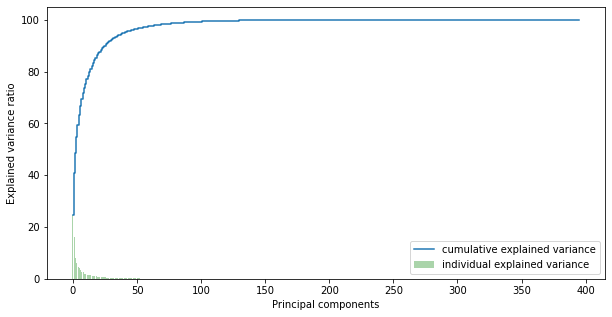

In [ ]:
X_std = StandardScaler().fit_transform(X_train)
plot_explained_variance(X_std)

In [ ]:
#PCA
from sklearn.decomposition import PCA


In [ ]:

pca = PCA(150)
pca.fit(X_train)

PCA(n_components=150)

In [ ]:
X_train_reduced_pca=pca.transform(X_train)


In [ ]:
X_test_reduced_pca=pca.transform(X_test)

In [ ]:
clf = RandomForestClassifier(max_depth=25)
clf.fit(X_train_reduced_pca,y_train)
y_pred = clf.predict(X_test_reduced_pca)
print(classification_report(y_test, y_pred))


                      precision    recall  f1-score   support

                           1.00      1.00      1.00     55905
                   0       0.99      1.00      1.00     54600
                   1       1.00      0.67      0.80      1495

            accuracy                           1.00    112000
           macro avg       1.00      0.89      0.93    112000
        weighted avg       1.00      1.00      1.00    112000




#LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
X_train_reduced_lda=lda.transform(X_train)
X_test_reduced_lda=lda.transform(X_test)


In [ ]:
clf = RandomForestClassifier(max_depth=25)
clf.fit(X_train_reduced_lda,y_train)
y_pred = clf.predict(X_test_reduced_lda)
print(classification_report(y_test, y_pred))


                      precision    recall  f1-score   support

                           1.00      1.00      1.00     55905
                   0       0.99      1.00      1.00     54600
                   1       1.00      0.75      0.85      1495

            accuracy                           1.00    112000
           macro avg       1.00      0.92      0.95    112000
        weighted avg       1.00      1.00      1.00    112000

